In [1]:
import numpy as np 
import pandas as pd

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [5]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [14]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('C:/Users/hp/Desktop/brain_tumor_project/dataset/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        kernel = np.ones((5,5),np.uint8)
        img = cv2.erode(img, kernel, iterations=1)
        img = cv2.dilate(img, kernel, iterations=1)
            
        # Resize image to a fixed size (optional)
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('C:/Users/hp/Desktop/brain_tumor_project/dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        kernel = np.ones((5,5),np.uint8)
        img = cv2.erode(img, kernel, iterations=1)
        img = cv2.dilate(img, kernel, iterations=1)
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(np.array(img))
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [15]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [16]:
X_train,X_test,y_train,y_test  = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [17]:
y_train_new = []
for i in y_train:
  y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
  y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [18]:
from keras.models import Sequential
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.1)

Epoch 1/25
83/83 [==============================] - 295s 4s/step - loss: 1.1020 - accuracy: 0.4964 - val_loss: 0.9852 - val_accuracy: 0.5782
Epoch 2/25
83/83 [==============================] - 322s 4s/step - loss: 0.8993 - accuracy: 0.5974 - val_loss: 0.8918 - val_accuracy: 0.6190
Epoch 3/25
83/83 [==============================] - 300s 4s/step - loss: 0.8075 - accuracy: 0.6466 - val_loss: 0.6968 - val_accuracy: 0.7143
Epoch 4/25
83/83 [==============================] - 313s 4s/step - loss: 0.6883 - accuracy: 0.7060 - val_loss: 0.6833 - val_accuracy: 0.6871
Epoch 5/25
83/83 [==============================] - 318s 4s/step - loss: 0.6212 - accuracy: 0.7389 - val_loss: 0.6559 - val_accuracy: 0.7143
Epoch 6/25
83/83 [==============================] - 323s 4s/step - loss: 0.5061 - accuracy: 0.7938 - val_loss: 0.5653 - val_accuracy: 0.7619
Epoch 7/25
83/83 [==============================] - 345s 4s/step - loss: 0.4638 - accuracy: 0.8108 - val_loss: 0.4759 - val_accuracy: 0.8061
Epoch 8/25
83

In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

11/11 [==============================] - 7s 593ms/step - loss: 0.3281 - accuracy: 0.9205
Test accuracy: 0.9204893112182617


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

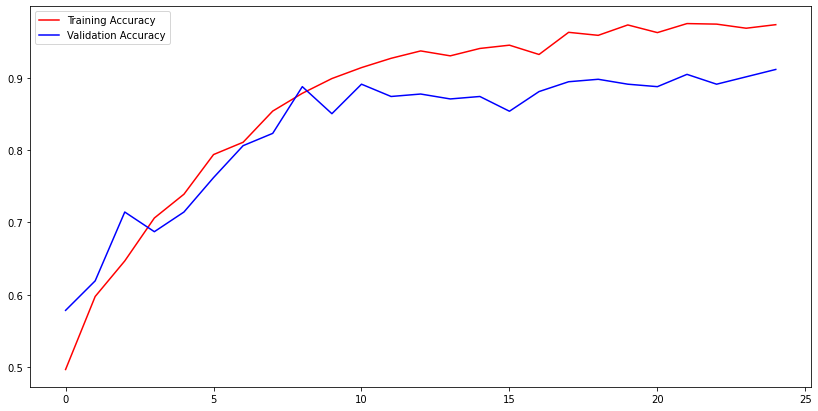

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

In [32]:
model.save('model.h5')

In [33]:
img = cv2.imread('/content/Y2.jpeg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

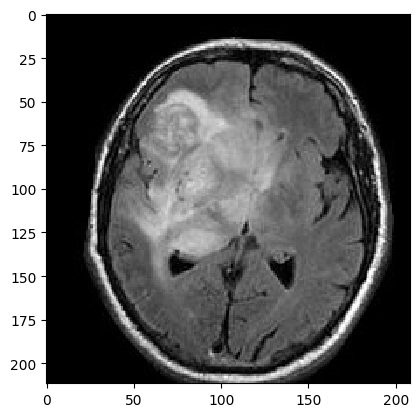

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/Y2.jpeg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 1s 751ms/step


0